In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import torch
import pandas as pd
import math

In [2]:
df_train=pd.read_csv("data/train.csv")

In [ ]:
df_train.head()

In [4]:
#three examples of categorical values
df_train[["LotFrontage","LotArea","TotalBsmtSF"]].head(10)

,LotFrontage,LotArea,TotalBsmtSF
0,65.0,8450,856
1,80.0,9600,1262
2,68.0,11250,920
3,60.0,9550,756
4,84.0,14260,1145
5,85.0,14115,796
6,75.0,10084,1686
7,NaN,10382,1107
8,51.0,6120,952
9,50.0,7420,991


In [5]:
#three examples of continuous
df_train[["MSZoning","Street","LotShape"]].head(10)

,MSZoning,Street,LotShape
0,RL,Pave,Reg
1,RL,Pave,Reg
2,RL,Pave,IR1
3,RL,Pave,IR1
4,RL,Pave,IR1
5,RL,Pave,IR1
6,RL,Pave,Reg
7,RL,Pave,IR1
8,RM,Pave,Reg
9,RL,Pave,Reg


<Axes: title={'center': 'Histogram of LotFrontage'}, ylabel='Frequency'>

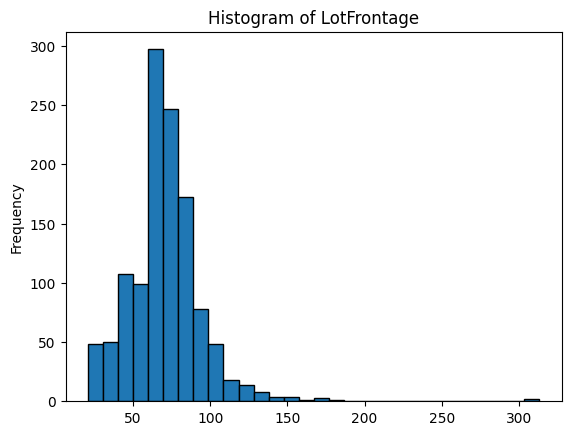

In [6]:
#histogram for continuous
df_train['LotFrontage'].plot(kind='hist', bins=30, edgecolor='black', title='Histogram of LotFrontage')

<Axes: title={'center': 'Bar Chart of Lot Shape'}, xlabel='LotShape'>

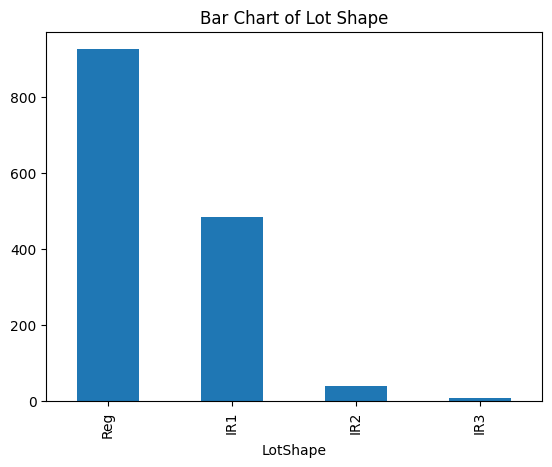

In [7]:
#bar chart for categorical
df_train['LotShape'].value_counts().plot(kind='bar', title='Bar Chart of Lot Shape')

In [8]:
#pre processing data-get nulls
# Calculate the percentage of null values for each column
null_percentage = df_train.isnull().mean() * 100

# Filter columns where more than 50% of the values are null
majority_null_columns = null_percentage[null_percentage > 50].index.tolist()

# Display
print("Columns with majority null values:")
print(majority_null_columns)

Columns with majority null values:
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
#pre processing data-identify single categories
# Identify categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Find columns that mainly have a single category
single_category_columns = [col for col in categorical_columns if df_train[col].value_counts(normalize=True).iloc[0] > 0.85]

# Display the columns that were removed
print("Columns removed due to having a majority single category:")
print(single_category_columns)

Columns removed due to having a majority single category:
['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType']


In [10]:
# Drop the columns
df_train_cleaned = df_train.drop(columns=single_category_columns+majority_null_columns+['HouseStyle', 'Exterior1st','Exterior2nd','KitchenQual','MSZoning'])

In [11]:
#I think that "Neighborhood", "LotShape", and "LandSlope" are some 
#examples of features for OHE because they are categorical values
#that should be in a numerical order for the system to translate it

In [12]:
#Deal with missing values
cat_columns = []
numerical_columns = []
#cleaning out missing categories 
for col in df_train_cleaned.columns:
    if df_train_cleaned[col].dtype == 'O':
        cat_columns.append(col)
    else:
        numerical_columns.append(col)
for col in cat_columns:
    df_train_cleaned[col] = df_train_cleaned[col].fillna('MISSING').astype(str)
for col in numerical_columns:
    df_train_cleaned[col].fillna(0, inplace=True)

/var/folders/rm/yf59cr5x10x91ftqwtg5wcgc0000gn/T/ipykernel_21724/2210739803.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_cleaned[col].fillna(0, inplace=True)


In [13]:
# One-hot encode the 'color' column
df_encoded = pd.get_dummies(df_train_cleaned, dtype=float, columns=['LotShape'])

display(df_encoded)

,Id,MSSubClass,LotFrontage,LotArea,LotConfig,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,...,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,1,60,65.0,8450,Inside,CollgCr,1Fam,7,5,2003,...,0,0,2,2008,Normal,208500,0.0,0.0,0.0,1.0
1,2,20,80.0,9600,FR2,Veenker,1Fam,6,8,1976,...,0,0,5,2007,Normal,181500,0.0,0.0,0.0,1.0
2,3,60,68.0,11250,Inside,CollgCr,1Fam,7,5,2001,...,0,0,9,2008,Normal,223500,1.0,0.0,0.0,0.0
3,4,70,60.0,9550,Corner,Crawfor,1Fam,7,5,1915,...,0,0,2,2006,Abnorml,140000,1.0,0.0,0.0,0.0
4,5,60,84.0,14260,FR2,NoRidge,1Fam,8,5,2000,...,0,0,12,2008,Normal,250000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Inside,Gilbert,1Fam,6,5,1999,...,0,0,8,2007,Normal,175000,0.0,0.0,0.0,1.0
1456,1457,20,85.0,13175,Inside,NWAmes,1Fam,6,6,1978,...,0,0,2,2010,Normal,210000,0.0,0.0,0.0,1.0
1457,1458,70,66.0,9042,Inside,Crawfor,1Fam,7,9,1941,...,0,2500,5,2010,Normal,266500,0.0,0.0,0.0,1.0
1458,1459,20,68.0,9717,Inside,NAmes,1Fam,5,6,1950,...,0,0,4,2010,Normal,142125,0.0,0.0,0.0,1.0


<Axes: title={'center': 'Bar Chart of Lot Shape'}, xlabel='LotShape'>

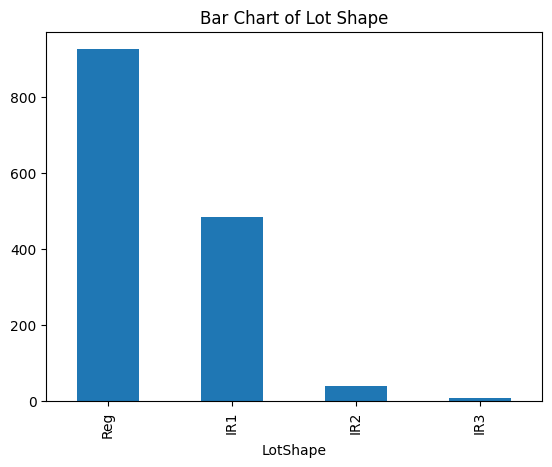

In [14]:
#Before one hot encoding
df_train_cleaned['LotShape'].value_counts().plot(kind='bar', title='Bar Chart of Lot Shape')

<Axes: >

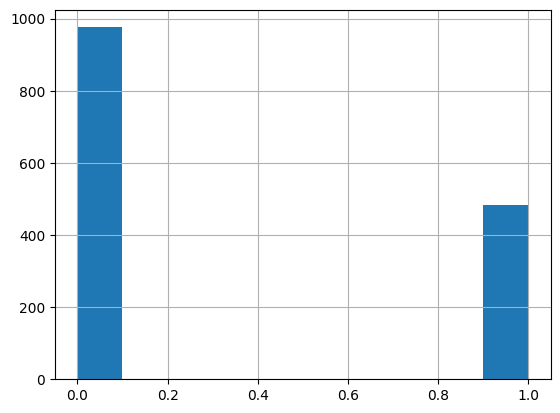

In [15]:
#After one hot encoding 
df_encoded["LotShape_IR1"].hist()

In [16]:
#Chose to normalize to have same range 
df_encoded = pd.get_dummies(df_train_cleaned.drop(columns=['Id']), dtype=float)

display(df_encoded.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_Fin,GarageFinish_MISSING,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
#creating X and Y
X = df_encoded.drop(columns=["SalePrice"])
Y = df_encoded['SalePrice']

In [18]:
#scaling
from sklearn.preprocessing import MinMaxScaler

cols = X.columns.tolist()

scaler = MinMaxScaler()
X[cols] = scaler.fit_transform(X[cols])

In [19]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_Fin,GarageFinish_MISSING,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [21]:
#OLS MSE and R^2
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X)
print("Mean Squared Error (MSE):", mean_squared_error(Y, y_pred))
print("R-squared (R²):", r2_score(Y, y_pred))

Mean Squared Error (MSE): 773686246.3739727
R-squared (R²): 0.8773248483116669


In [22]:
df_test=pd.read_csv("data/test.csv")

In [23]:
df_test_cleaned = df_test.drop(columns=single_category_columns+majority_null_columns+['HouseStyle', 'Exterior1st','Exterior2nd','KitchenQual','MSZoning'])

In [24]:
#getting rid of sales price
numerical_columns=[
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [25]:
#cleaning out missing categories
for col in cat_columns:
    df_test_cleaned[col] = df_test_cleaned[col].fillna('MISSING').astype(str)
for col in numerical_columns:
    df_test_cleaned[col].fillna(0, inplace=True)

/var/folders/rm/yf59cr5x10x91ftqwtg5wcgc0000gn/T/ipykernel_21724/2606480508.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_cleaned[col].fillna(0, inplace=True)


In [26]:
#Chose to normalize to have same range 
df_encoded = pd.get_dummies(df_test_cleaned.drop(columns=['Id']), dtype=float)

In [27]:
#scaling
df_encoded[cols] = scaler.fit_transform(df_encoded[cols])

In [28]:
#fitting test data 
y_test_pred = model.predict(df_encoded)

In [29]:
#saving the output
df_predictions = pd.DataFrame(y_test_pred).rename(columns={0:'SalePrice'})
df_predictions['Id'] = df_test['Id']

df_predictions.to_csv('predictions.csv', index=False)

# Leadership Board

<img src="kaggle.png">